# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

The following packages have been used to run the code for this assignment. 

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Question 1

We begin by defining all known parameters and writing up functions for every given equations in the assignment. Afterwards, we use optimize from the scipy-package in a function that solves that maximizes utility given consumption and minimizing labor supply.

In [2]:
#Defining parameters.
m = 1 #cash-on-hand.
v = 10 #scales the disutility of labor.
eps= 0.3 #elasticity of labor supply
tau0 = 0.4 #standard labor income tax.
tau1 = 0.1 #top bracket labor income tax.
kappa = 0.4 #the cut-off for the top labor income bracket.
w = 0.5 #wage rate set with the initial value 0.5.

#Defining utility as a function of labour supplu and consumption seen in eq(1).
def u_func(c,l,eps,v):
    return np.log(c)-v*(l**(1+1/eps)/(1+1/eps))

#Defining function for consumption, where c*=x because of monoticity seen from eq(2).
def c_func(l,w,m,tau0,tau1,kappa):
    c_def = m+w*l-(tau0*w*l+tau1*np.max([w*l-kappa,0]))
    return c_def

#Defining the utility constraint such that c=c_func.
def u_con(l,w,eps,v,tau0,tau1,kappa):
    c = c_func(l,w,m,tau0,tau1,kappa)
    return -u_func(c,l,v,eps)

#Defining a function for the solution of the utility maximization problem. 
def sol(w,eps,v,tau0,tau1,kappa,m):
    l_sol=optimize.minimize_scalar(u_con, method = 'bounded',bounds = (0,1), args = (w,eps,v,tau0,tau1,kappa))
    #Defining the optimal 
    l_ss = l_sol.x
    c_ss = c_func(m,w,l_ss,tau0,tau1,kappa)
    u_ss = u_func(l_ss,c_ss,eps,v)
    return [l_ss,c_ss,u_ss]

We have know created a function that will solve the utility maximization problem faced by consumers. 

# Question 2

The assignment asks us to plot labor supply (l*) and consumption (c*) in steady state when we have 10.000 observations and the wage rate is given in a ratio from 0.5 to 1.5. We define vectors for wage rate, consumption and labor supply using numpy array and and use the previosly defined function (sol) that solves the maximization problem. 

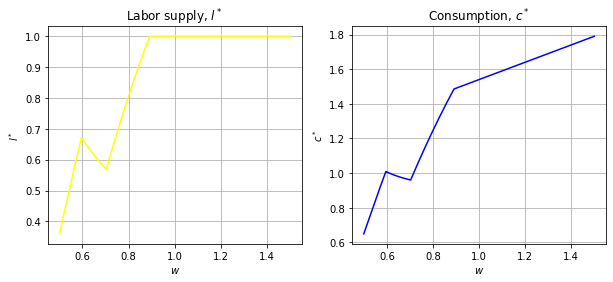

In [3]:
#Set number of observations.
N=10000

#Generate vectors for labour supply, consumption and wages.
w_vec = np.linspace(0.5,1.5,N) #this linespace() command return evenly spaced numbers over a specified interval.
l_vec = np.empty(N) #returns a new array of given (same N) shape and type, without initializing entries.
c_vec = np.empty(N) #returns a new array of given (same N) shape and type, without initializing entries.

for i,w in enumerate(w_vec):
    lc_bundle = sol(w,eps,v,tau0,tau1,kappa,m)
    l_vec[i] = lc_bundle[0]
    c_vec[i] = lc_bundle[1]

#Defining the figure's.
fig = plt.figure(figsize=(10,4))

#Left-side plot.
ax_left=fig.add_subplot(1,2,1)
ax_left.plot(w_vec,l_vec,color='yellow')

ax_left.set_title('Labor supply, $l^*$')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^*$')
ax_left.grid(True)

#Right-side plot.
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(w_vec,c_vec,color='blue')

ax_right.set_title('Consumption, $c^*$')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^*$')
ax_right.grid(True)

#Ploting figure. 
plt.show()

It's clear that there is a positive correlation between wage rate and labor supply. This also applies for wage rate and consumption. It can also be seen that labor supply and consumption is within the set bounderies $l\in[0,1]$ and $c\in[0,x]$. 

# Question 3

It is said that the wage rate is uniform $w\in[0.5,1.5]$ and we still have 10.000 individuals in our economy. Thereto, we set a seed number so we can recall any randomly generated values. Using this information we create a vector for wage rate consisting of random values within the uniform distribution . Further, we also define a vector for labor supply where we in both cases use numpy's array command. Then we define the given function for total tax revenue.

In [4]:
#Defining the uniform distribution of wage rate with random values saved by a seed number. 
N=10000
np.random.seed(100)
w_uni=np.random.uniform(low=0.5,high=1.5,size=N)

#Defining optimal labor supply by creating an empty list and iterating each wage rate. 
l_opt = np.empty(N) #this np.empty-command returns a new array of given (same N) shape and type, without initializing entries.
for i,w in enumerate(w_uni):
    lc_bundle = sol(w,eps,v,tau0,tau1,kappa,m)
    l_opt[i] = lc_bundle[0]

#Defining total tax revenue.  
def tax_rev(l_list): #this function uses a list of every individual labor supplier as parameter.
    #creating empty list to contain every revenue of each individual's paid tax.
    tax_list = np.empty(10000)
    #calculating the individual consumer tax revenue and summing it up.
    for i in range(10000):
        tax_list[i] = tau0*w_uni[i]*l_list[i]+tau1*np.max(w_uni[i]*l_list[i]-kappa,0)
    #returning the total sum of tax revenue. 
    return np.sum(tax_list)

#Print out total revenue. 
print(tax_rev(l_opt))


4176.8082102323715


We calculate the total tax revenue of this economy using the before menitioned information and we get a result of 4021.54.

# Question 4

This is almost the same procedure as the former question. We start by setting epsilion equal to the new value of 0.1 and again calculate the total tax revenue. 

In [5]:
#Defining new epsilion to the value of 0.1 given in the assignment. 
eps_new=0.1

#Redefining optimal labor supply and consumption given the new epsilion value. 
l_opt_new = np.empty(N)
c_opt_new = np.empty(N)
for i,w in enumerate(w_uni):
    lc_bundle=sol(w,eps_new,v,tau0,tau1,kappa,m)
    l_opt_new[i] = lc_bundle[0]
    c_opt_new[i] = lc_bundle[1]

#Print out total tax revenue for this new case. 
print(tax_rev(l_opt_new))


4588.317878945158


In this case the total tax revenue is now larger then in the former case and we get a result of 4588.31. 

# Question 5

We will change the epsilon value back to the initial value for epsilon to $\epsilon=0.3$ before tackeling this question. 

In [6]:
ep=0.3

In order to give the best political advice with regards to the optimal values of the relevent and used economical parameters we are going to use loops. We have limited the amount of different values each single parameter can take to five each. 

In [7]:
kappa_new = np.linspace(0,1.5,5)
tau0_new = np.linspace(0,1,5)
tau1_new = np.linspace(0,1,5)

print('Kappa', kappa_new)
print('Tau0', tau0_new)
print('Tau1', tau1_new)

Kappa [0.    0.375 0.75  1.125 1.5  ]
Tau0 [0.   0.25 0.5  0.75 1.  ]
Tau1 [0.   0.25 0.5  0.75 1.  ]


Then we formulate a function for the total tax revenue and also create a list of the optimal labour supply for each individual consumer. 

In [8]:
def total_tax_rev(tau0,tau1,kappa,w_uni,eps,v,m):
    l_list = np.empty(10000)
    for s,wa in enumerate(w_uni):
        opt_list=sol(wa,eps,v,tau0,tau1,kappa,m)
        l_list[s]=opt_list[0]
    return tax_rev(l_list)

We create iterations to find the optimal values of the economical parameters and afterwards reduce the interval of values that each economical parameter is limited by when looping again.  



Running Loop (1)

In [ ]:
#Create a guess for the best value of each parameter and total tax revenue.
kappa_opt = 0
tau0_opt = 0
tau1_opt = 0
rev_opt = 0

#Begin loop that creats varius permutations of the selected parameter values. 
for i in kappa_new:
    for j in tau0_new:
        for m in tau1_new:
            tau0 = j
            tau1 = m
            kappa = i
            rev = total_tax_rev(tau0,tau1,kappa,w_uni,eps,v,m)
            if rev > rev_opt: # If the combination of parameters gives higher total tax revenue than best_rev,
                               # then the best guesses for parameter values are updated:
                rev_opt = rev
                kappa_opt = kappa
                tau0_opt = tau0
                tau1_opt = tau1
# Now printing the results:
print('Optimal value of kappa', kappa_opt)
print('Optimal value of tau0', tau0_opt)
print('Optimal value of tau1', tau1_opt)
print('Optimal value of tax rev', rev_opt)

Running Loop (2)

In [ ]:
kappa_new = np.linspace(0,1.5,5)
tau0_new = np.linspace(0,1,5)
tau1_new = np.linspace(0,1,5)

#Create a guess for the best value of each parameter and total tax revenue.
kappa_opt = 0
tau0_opt = 0
tau1_opt = 0
rev_opt = 0

#Begin loop that creats varius permutations of the selected parameter values. 
for i in kappa_new:
    for j in tau0_new:
        for m in tau1_new:
            tau0 = j
            tau1 = m
            kappa = i
            rev = total_tax_rev(tau0,tau1,kappa,w_uni,eps,v,m)
            if rev > rev_opt: # If the combination of parameters gives higher total tax revenue than best_rev,
                               # then the best guesses for parameter values are updated:
                rev_opt = rev
                kappa_opt = kappa
                tau0_opt = tau0
                tau1_opt = tau1
# Now printing the results:
print('Optimal value of kappa', kappa_opt)
print('Optimal value of tau0', tau0_opt)
print('Optimal value of tau1', tau1_opt)
print('Optimal value of tax rev', rev_opt)

Running Loop (3)

In [ ]:
kappa_new = np.linspace(0,1.5,5)
tau0_new = np.linspace(0,1,5)
tau1_new = np.linspace(0,1,5)

#Create a guess for the best value of each parameter and total tax revenue.
kappa_opt = 0
tau0_opt = 0
tau1_opt = 0
rev_opt = 0

#Begin loop that creats varius permutations of the selected parameter values. 
for i in kappa_new:
    for j in tau0_new:
        for m in tau1_new:
            tau0 = j
            tau1 = m
            kappa = i
            rev = total_tax_rev(tau0,tau1,kappa,w_uni,eps,v,m)
            if rev > rev_opt: # If the combination of parameters gives higher total tax revenue than best_rev,
                               # then the best guesses for parameter values are updated:
                rev_opt = rev
                kappa_opt = kappa
                tau0_opt = tau0
                tau1_opt = tau1
# Now printing the results:
print('Optimal value of kappa', kappa_opt)
print('Optimal value of tau0', tau0_opt)
print('Optimal value of tau1', tau1_opt)
print('Optimal value of tax rev', rev_opt)

# Conclusion

This assignment seeks to analyze, how labor supply, consumption and wage rate interact's and effect an economy given certain scenarios. We have learned that wage rate is positively correlated with labor supply and consumption respectively. Effects from changes in the elasticity of labor supply was also analyzed. We concluded that a lower elasticity of labor supply will increase the tax revenue given nothing els changes. 